In [166]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [167]:
url = 'https://raw.githubusercontent.com/okHotel/ssd_project/master/data_set/daily-min-temperatures.csv'
df = pd.read_csv(url)

mask = (df['Date'] > '1988-01-01') & (df['Date'] <= '1990-12-31')
df = df.loc[mask]

#print(df.head())
df = df.sort_values(by=['Date'])
fig = px.line(df, x = 'Date', y = 'Temp', title='Mininum temperature trend of Melbourne')
#fig.show()

SVR prevision

In [168]:
df.insert(0, 'id', range(0,len(df)))

X = df[['id']].values.reshape(-1,1)
y = df[['Temp']].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [169]:
# !!! Con kernel rbf scazza le previsioni.
# !!! Con kernel linear molto meglio !!!
regressor = SVR(kernel='rbf', C=100, gamma=0.001, epsilon=.1)
regressor.fit(X_train,y_train)

C:\Users\varin\Anaconda3\envs\ssd\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [170]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

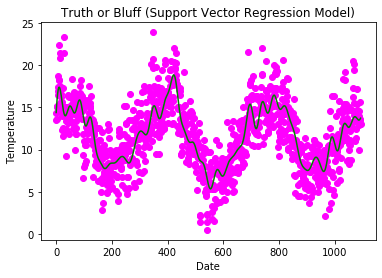

In [171]:
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Id')
plt.ylabel('Temperature')
plt.show()

In [172]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test.flatten(), y=y_pred.flatten(),
                    mode='markers',
                    name='predicted data'))
fig.add_trace(go.Scatter(x=X_test.flatten(), y=y_test.flatten(),
                    mode='markers',
                    name='test data'))

fig.show()